In [2]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd

In [3]:
df = pd.read_csv('iris.csv')

In [4]:
df.head()

,PetalLength,SepalWidth,SepalLength,PetalWidth,Species
0,1.4,3.5,5.1,0.2,Iris-setosa
1,1.4,3.0,4.9,0.2,Iris-setosa
2,1.3,3.2,4.7,0.2,Iris-setosa
3,1.5,3.1,4.6,0.2,Iris-setosa
4,1.4,3.6,5.0,0.2,Iris-setosa


In [6]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df = df.apply(encoder.fit_transform)
df

,PetalLength,SepalWidth,SepalLength,PetalWidth,Species
0,4,14,8,1,0
1,4,9,6,1,0
2,3,11,4,1,0
3,5,10,3,1,0
4,4,15,7,1,0
...,...,...,...,...,...
145,28,9,24,19,2
146,26,4,20,15,2
147,28,9,22,16,2
148,30,13,19,19,2


In [7]:
X = df.iloc[:,:].values
print(X[:5])

[[ 4 14  8  1  0]
 [ 4  9  6  1  0]
 [ 3 11  4  1  0]
 [ 5 10  3  1  0]
 [ 4 15  7  1  0]]


In [38]:
import random
import numpy as np

class KMeans1:
    def __init__(self,n_clusters=3,max_iter=100):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = None

    def fit_predict(self,X):

        random_index = random.sample(range(0,X.shape[0]),self.n_clusters)
        self.centroids = X[random_index]

        for i in range(self.max_iter):
            # assign clusters
            cluster_group = self.assign_clusters(X)
            old_centroids = self.centroids
            # move centroids
            self.centroids = self.move_centroids(X,cluster_group)
            # check finish
            if (old_centroids == self.centroids).all():
                break

        return cluster_group

    def assign_clusters(self,X):
        cluster_group = []
        distances = []

        for row in X:
            for centroid in self.centroids:
                distances.append(np.sqrt(np.dot(row-centroid,row-centroid)))
            min_distance = min(distances)
            index_pos = distances.index(min_distance)
            cluster_group.append(index_pos)
            distances.clear()

        return np.array(cluster_group)

    def move_centroids(self,X,cluster_group):
        new_centroids = []

        cluster_type = np.unique(cluster_group)

        for type in cluster_type:
            new_centroids.append(X[cluster_group == type].mean(axis=0))

        return np.array(new_centroids)


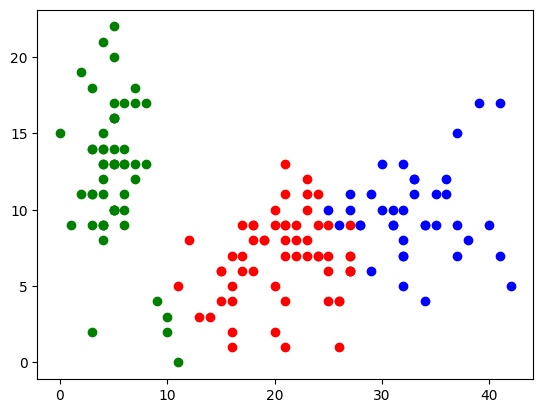

In [45]:
km = KMeans1(n_clusters=3,max_iter=1000)
y_means = km.fit_predict(X)

plt.scatter(X[y_means == 0,0],X[y_means == 0,1],color='red')
plt.scatter(X[y_means == 1,0],X[y_means == 1,1],color='blue')
plt.scatter(X[y_means == 2,0],X[y_means == 2,1],color='green')
# plt.scatter(X[y_means == 3,0],X[y_means == 3,1],color='yellow')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to '

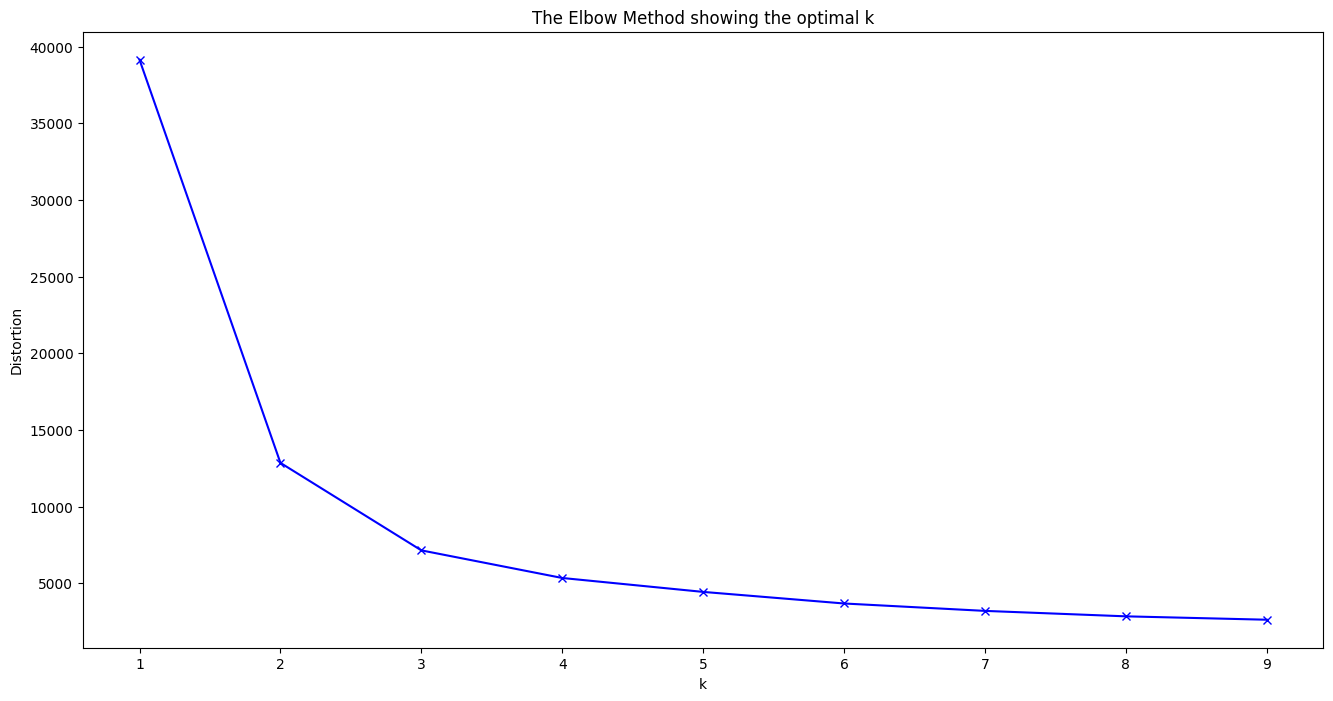

In [42]:
from sklearn.cluster import KMeans
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()